Iteration number:  1
	Number of matched groups formed in total:  8
	Unmatched treated units:  7 out of a total of  100 treated units
	Unmatched control units:  1 out of a total of  100 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  192
	Number of matches made so far:  192
	In this iteration, the covariates dropped are:  set()
192 units matched. We stopped before doing iteration number:  1


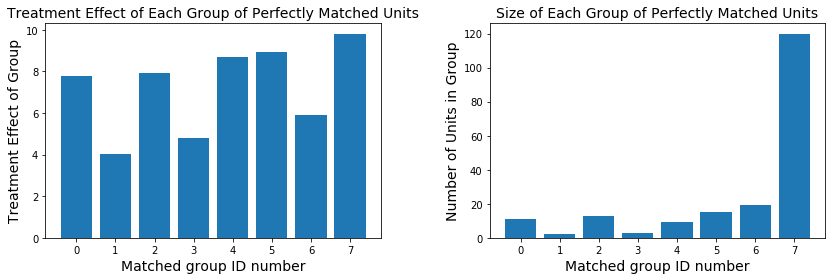

In [2]:
import dame_flame
import matplotlib.pyplot as plt


df,_ = dame_flame.utils.data.gen_data_decay_importance(num_control=100, num_treated=100, 
                    num_cov=5, bernoulli_param=0.9, bi_mean=2, bi_stdev=1)

model = dame_flame.matching.FLAME(verbose=3, early_stop_iterations=1)
model.fit(holdout_data=df)
res = model.predict(df)

groups = list(range(len(model.units_per_group)))
cate_of_group = []
len_group = []
for group in model.units_per_group:
    cate_of_group.append(dame_flame.utils.post_processing.CATE(model, group[0]))
    len_group.append(len(group))
    
    
f, ax = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(12,4))
ax[0].set_ylabel('Treatment Effect of Group', fontsize=14)
ax[0].set_xlabel('Matched group ID number', fontsize=14)
ax[0].set_title('Treatment Effect of Each Group of Perfectly Matched Units', fontsize=14)
ax[0].bar(groups,cate_of_group)

ax[1].set_ylabel('Number of Units in Group', fontsize=14)
ax[1].set_xlabel('Matched group ID number', fontsize=14)
ax[1].set_title('Size of Each Group of Perfectly Matched Units', fontsize=14)
ax[1].bar(groups,len_group)

plt.tight_layout()
plt.savefig('treatment_effect_size_of_groups.png')